# Student grades prediction

# Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades.

Columns Description-  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv

In [328]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore,boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import re

In [330]:
gradesdf=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\Grades.csv')
gradesdf.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [332]:
gradesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [334]:
gradesdf.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [336]:
gradesdf.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [338]:
cgpa=gradesdf[['Seat No.','PH-121','HS-101','CS-105','CGPA']]
cgpa.head()

,Seat No.,PH-121,HS-101,CS-105,CGPA
0,CS-97001,B-,D+,D+,2.205
1,CS-97002,A,D,C,2.008
2,CS-97003,A,B,A,3.608
3,CS-97004,D,C+,A-,1.906
4,CS-97005,A-,A-,A,3.448


In [340]:
grades_df=gradesdf.drop(columns=['Seat No.','PH-121','HS-101','CS-105','CGPA'],axis=1)
grades_df.head()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,A-,B,B,A,C,A,A,A,A-,A
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [342]:
imp=SimpleImputer(strategy='constant',fill_value='N/A')
gradesdata=imp.fit_transform(grades_df)

In [344]:
grades=pd.DataFrame(gradesdata,columns=grades_df.columns)

In [346]:
grades.head()

,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,C-,C,C-,D,C-,B-,C-,C-,B+,D,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,D+,D,B-,D,A,D+,D,B+,C+,B-,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B-,B+,B-,B+,A-,A-,B-,A-,A,...,A-,B,B,A,C,A,A,A,A-,A
3,D+,D,D,D+,C-,D,C+,D,B,D+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,B+,A,A-,B+,A,A-,C,A,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [348]:
grade=pd.concat([cgpa,grades],axis=1)
grade.head()

,Seat No.,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,CS-97001,B-,D+,D+,2.205,C-,C,C-,D,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,CS-97002,A,D,C,2.008,D+,D,B-,D,A,...,D,D+,D,C,D,A-,B-,C,C,B
2,CS-97003,A,B,A,3.608,A,B-,B+,B-,B+,...,A-,B,B,A,C,A,A,A,A-,A
3,CS-97004,D,C+,A-,1.906,D+,D,D,D+,C-,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,CS-97005,A-,A-,A,3.448,A-,B+,A,A-,B+,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [350]:
gradesdf.shape

(571, 43)

In [352]:
grade.shape

(571, 43)

In [354]:
grade.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CS-105       0
CGPA         0
CY-105       0
HS-105/12    0
MT-111       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

In [356]:
grade.duplicated().sum()

0

In [358]:
grade['Seat No.']=grade['Seat No.'].str.replace(r'\w.-','',regex=True)

In [360]:
grade.set_index(keys='Seat No.',inplace=True)

In [362]:
grade.head()

,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
97001,B-,D+,D+,2.205,C-,C,C-,D,C-,B-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
97002,A,D,C,2.008,D+,D,B-,D,A,D+,...,D,D+,D,C,D,A-,B-,C,C,B
97003,A,B,A,3.608,A,B-,B+,B-,B+,A-,...,A-,B,B,A,C,A,A,A,A-,A
97004,D,C+,A-,1.906,D+,D,D,D+,C-,D,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
97005,A-,A-,A,3.448,A-,B+,A,A-,B+,A,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A


In [364]:
studgrades=grade['CGPA']
gradesdf=grade.drop(columns=['CGPA'],axis=1)

In [366]:
for i in gradesdf:
    print("Unique value for",i,"are",gradesdf[i].unique())

Unique value for PH-121 are ['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
Unique value for HS-101 are ['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
Unique value for CS-105 are ['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
Unique value for CY-105 are ['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'N/A' 'WU' 'A+' 'F']
Unique value for HS-105/12 are ['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'N/A' 'WU' 'A+' 'F']
Unique value for MT-111 are ['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'N/A' 'A+' 'F' 'WU']
Unique value for CS-106 are ['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'N/A' 'A+' 'F' 'WU']
Unique value for EL-102 are ['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'N/A' 'A+' 'WU' 'F']
Unique value for EE-119 are ['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 'N/A' 'A+']
Unique value for ME-107 are ['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 'N/A' 'F' 'A+']
Unique value for CS-107 are ['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A

In [368]:
dict_grade={'A+':15,'A':14,'B+':13,'B':12,'C+':11,'C':10,'D+':9,'D':8,'C-':7,'B-':6,'A-':5,'F':1,'I':0,'WU':0,'W':0,'N/A':0}

In [370]:
#stud_grad=['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111','CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20','MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301','CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']

stud_grad=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111','CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20','MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301','CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312','CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']

In [372]:
grade[stud_grad]=grade[stud_grad].replace(dict_grade)

In [374]:
gradesdf=grade.drop(columns=['CGPA'],axis=1)

In [376]:
for i in gradesdf:
    print("Unique value for",i,"are",gradesdf[i].unique())

Unique value for PH-121 are [ 6 14  8  5 13 12 11 10  7  9  0 15  1]
Unique value for HS-101 are [ 9  8 12 11  5  6  7 13 10 14 15  1]
Unique value for CS-105 are [ 9 10 14  5 12  6 13 11  7 15  8]
Unique value for CY-105 are [ 7  9 14  5 12 11 13  6 10  8  0 15  1]
Unique value for HS-105/12 are [10  8  6 13  9 12  7 11  5 14  0 15  1]
Unique value for MT-111 are [ 7  6 13  8 14 11  5 10 12  9  0 15  1]
Unique value for CS-106 are [ 8  6  9  5 11 14  7 10 12 13  0 15  1]
Unique value for EL-102 are [ 7 14 13 12  5  6 10 11  9  8  0 15  1]
Unique value for EE-119 are [ 6  9  5  8 14 13 12  7 11 10  0 15]
Unique value for ME-107 are [ 7  8  5 11 13 14  9 10 12  6  0  1 15]
Unique value for CS-107 are [ 7 13  6  8 10  5 11  9 12 14  0 15  1]
Unique value for HS-205/20 are [13 11  5 12 14  6  0  8 15 10  9  7  1]
Unique value for MT-222 are [ 8  6 14  9 10 13  5 12 11  0  7  1 15]
Unique value for EE-222 are [ 5  7 14  6 13 11  9 12  0 10 15  8  1]
Unique value for MT-224 are [ 6  9 14  8

In [378]:
grade.head()

,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
97001,6,9,9,2.205,7,10,7,8,7,6,...,10,7,7,7,7,5,14,7,12,5
97002,14,8,10,2.008,9,8,6,8,14,9,...,8,9,8,10,8,5,6,10,10,12
97003,14,12,14,3.608,14,6,13,6,13,5,...,5,12,12,14,10,14,14,14,5,14
97004,8,11,5,1.906,9,8,8,9,7,8,...,7,9,10,9,7,6,12,11,11,11
97005,5,5,14,3.448,5,13,14,5,13,14,...,5,6,13,13,6,5,14,5,5,14


In [380]:
first_year=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107']
second_year=['HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214','EE-217', 'CS-212', 'CS-215']
third_year=['MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317']
fourth_year=['CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']

In [382]:
grade.describe()

,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,9.828371,9.150613,10.345009,2.954888,10.327496,10.194396,9.616462,9.609457,9.793345,9.492119,...,9.176883,10.397548,9.292469,9.877408,9.021016,7.760070,10.003503,9.239930,9.229422,8.031524
std,3.618466,3.011978,3.840923,0.620552,3.894161,3.427296,3.695660,3.468128,3.647064,3.499552,...,3.684756,3.795370,3.433110,3.827742,3.414044,4.902225,4.304627,3.678799,3.759187,4.851737
min,0.000000,1.000000,5.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,6.000000,2.538000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000
50%,10.000000,9.000000,12.000000,3.029000,12.000000,11.000000,10.000000,11.000000,10.000000,10.000000,...,9.000000,11.000000,10.000000,11.000000,10.000000,6.000000,12.000000,10.000000,10.000000,7.000000
75%,13.000000,12.000000,14.000000,3.451000,14.000000,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.000000,14.000000,12.000000,14.000000,12.000000,13.000000,14.000000,12.500000,13.000000,13.000000
max,15.000000,15.000000,15.000000,3.985000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


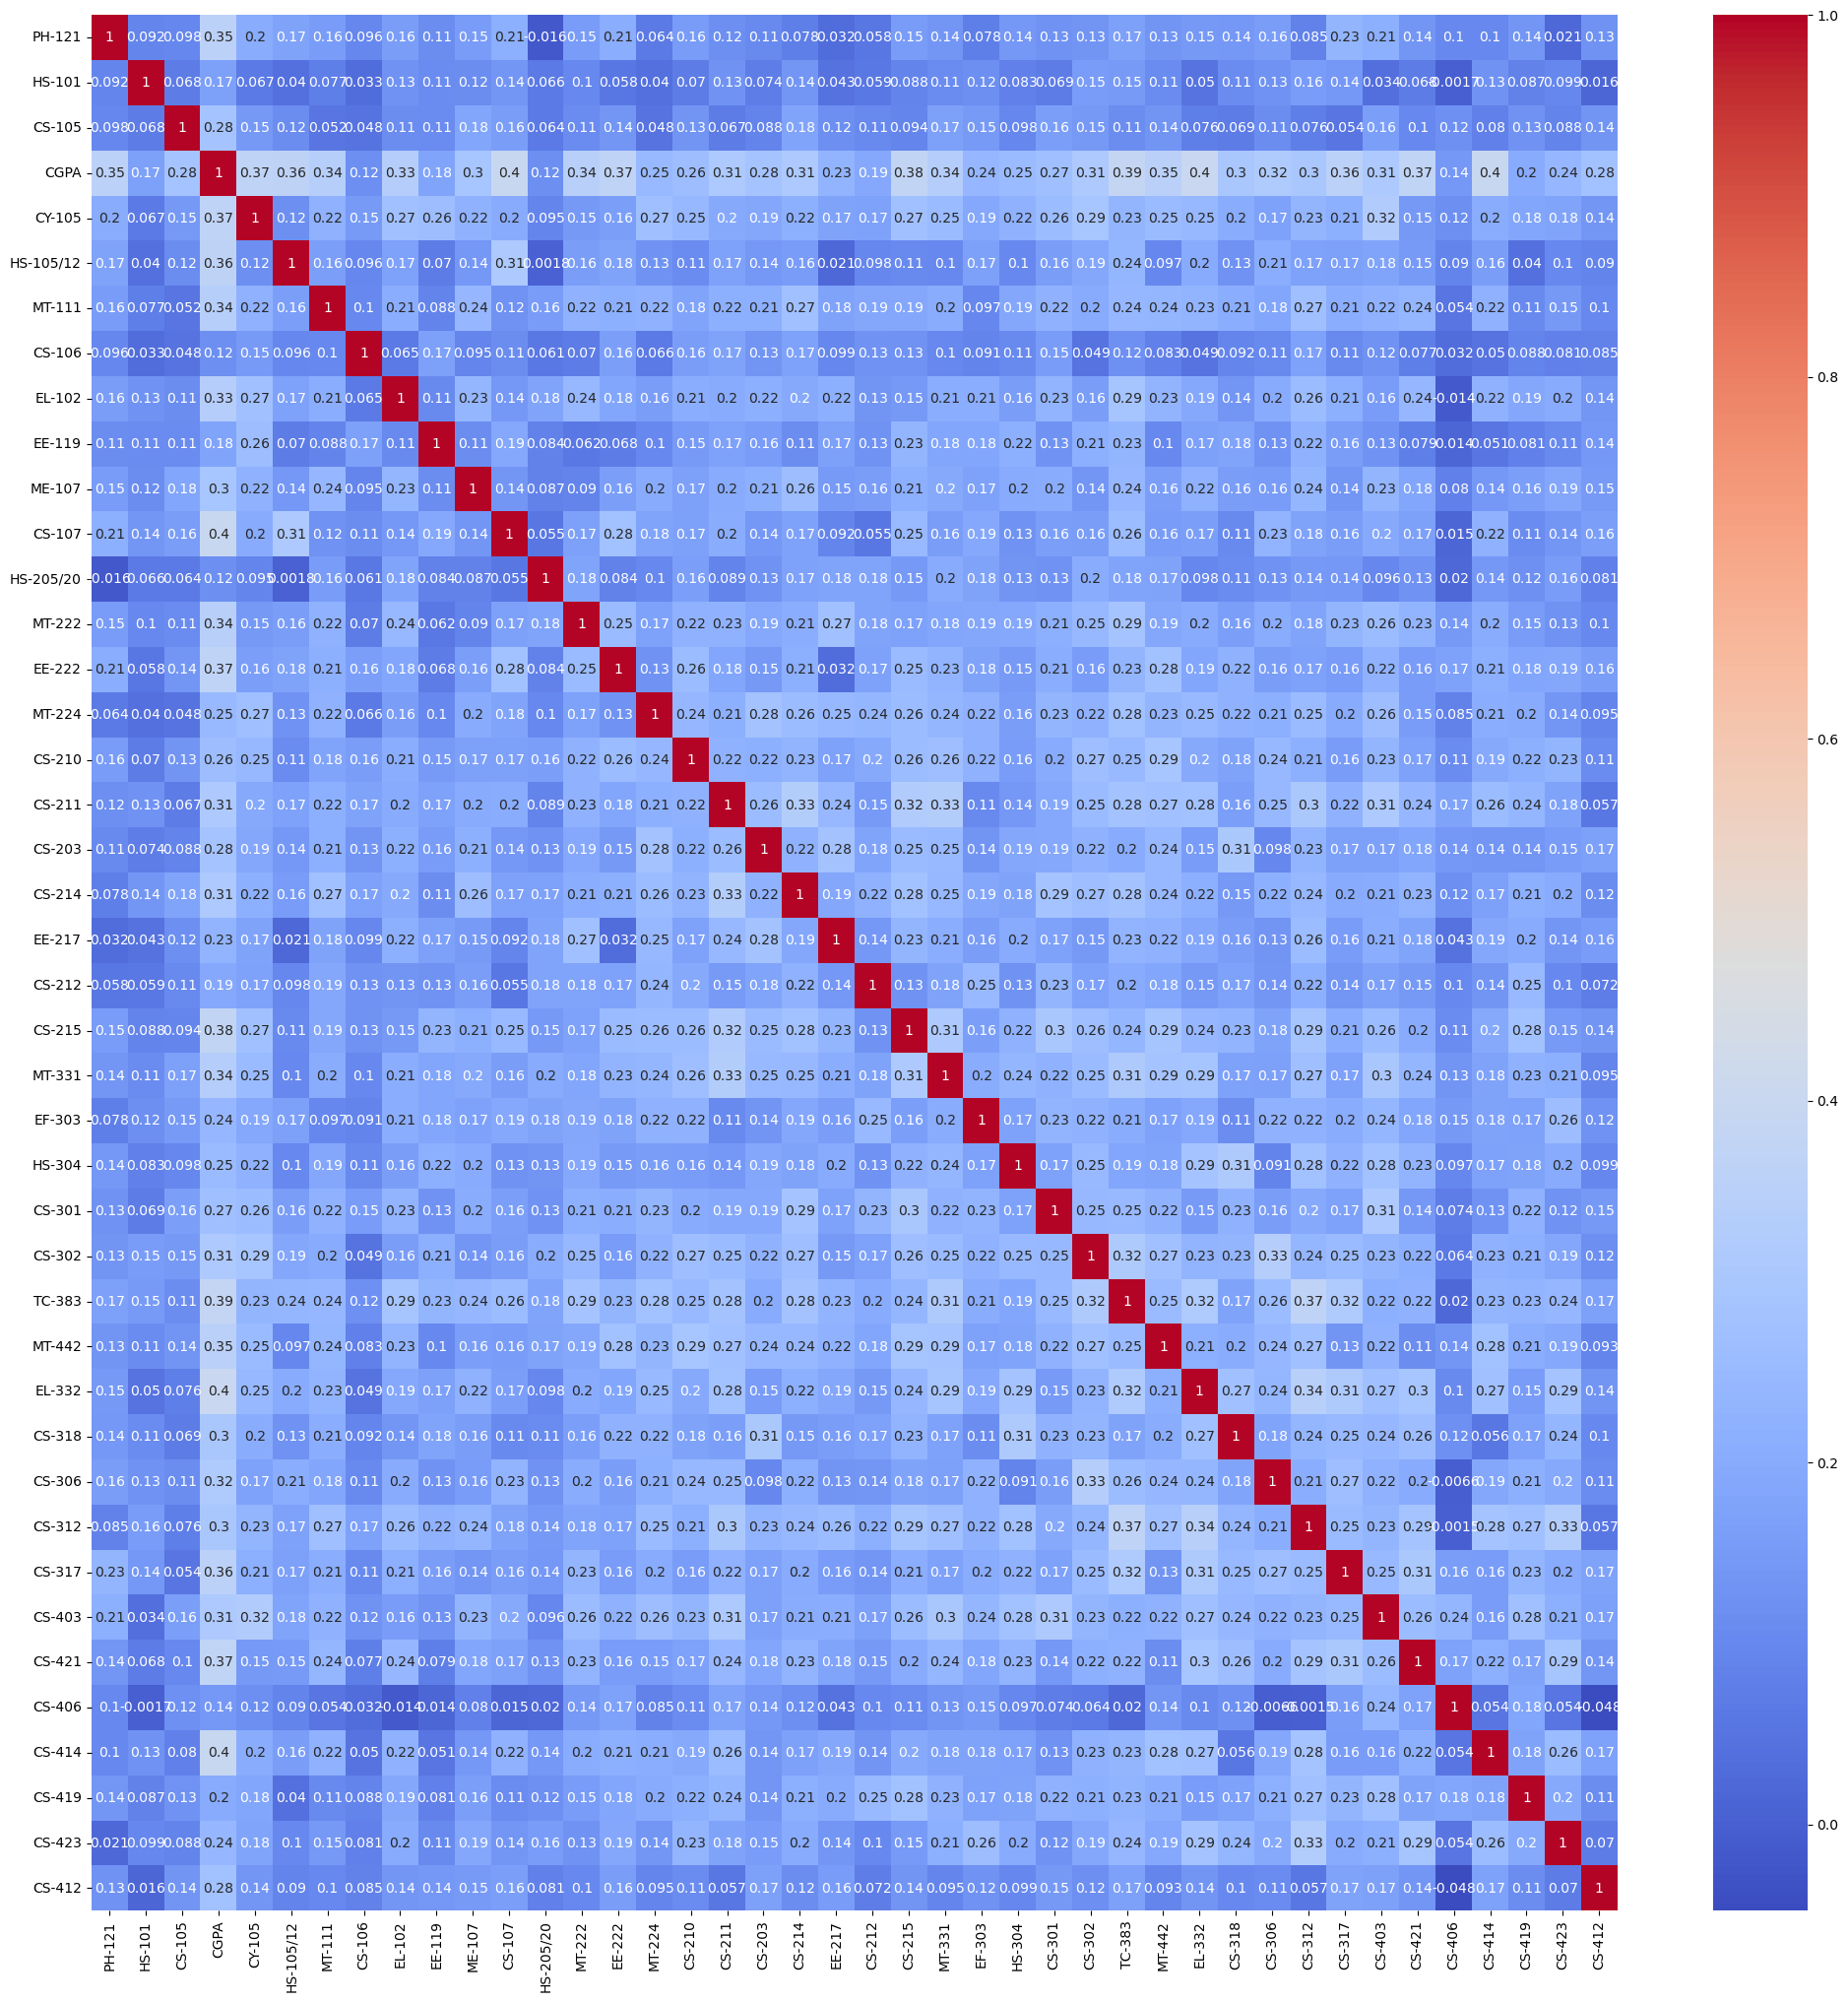

In [384]:
plt.figure(figsize=(25,25))
sns.heatmap(grade.corr(),annot=True,cmap='coolwarm',fmt='.2g')
plt.show()

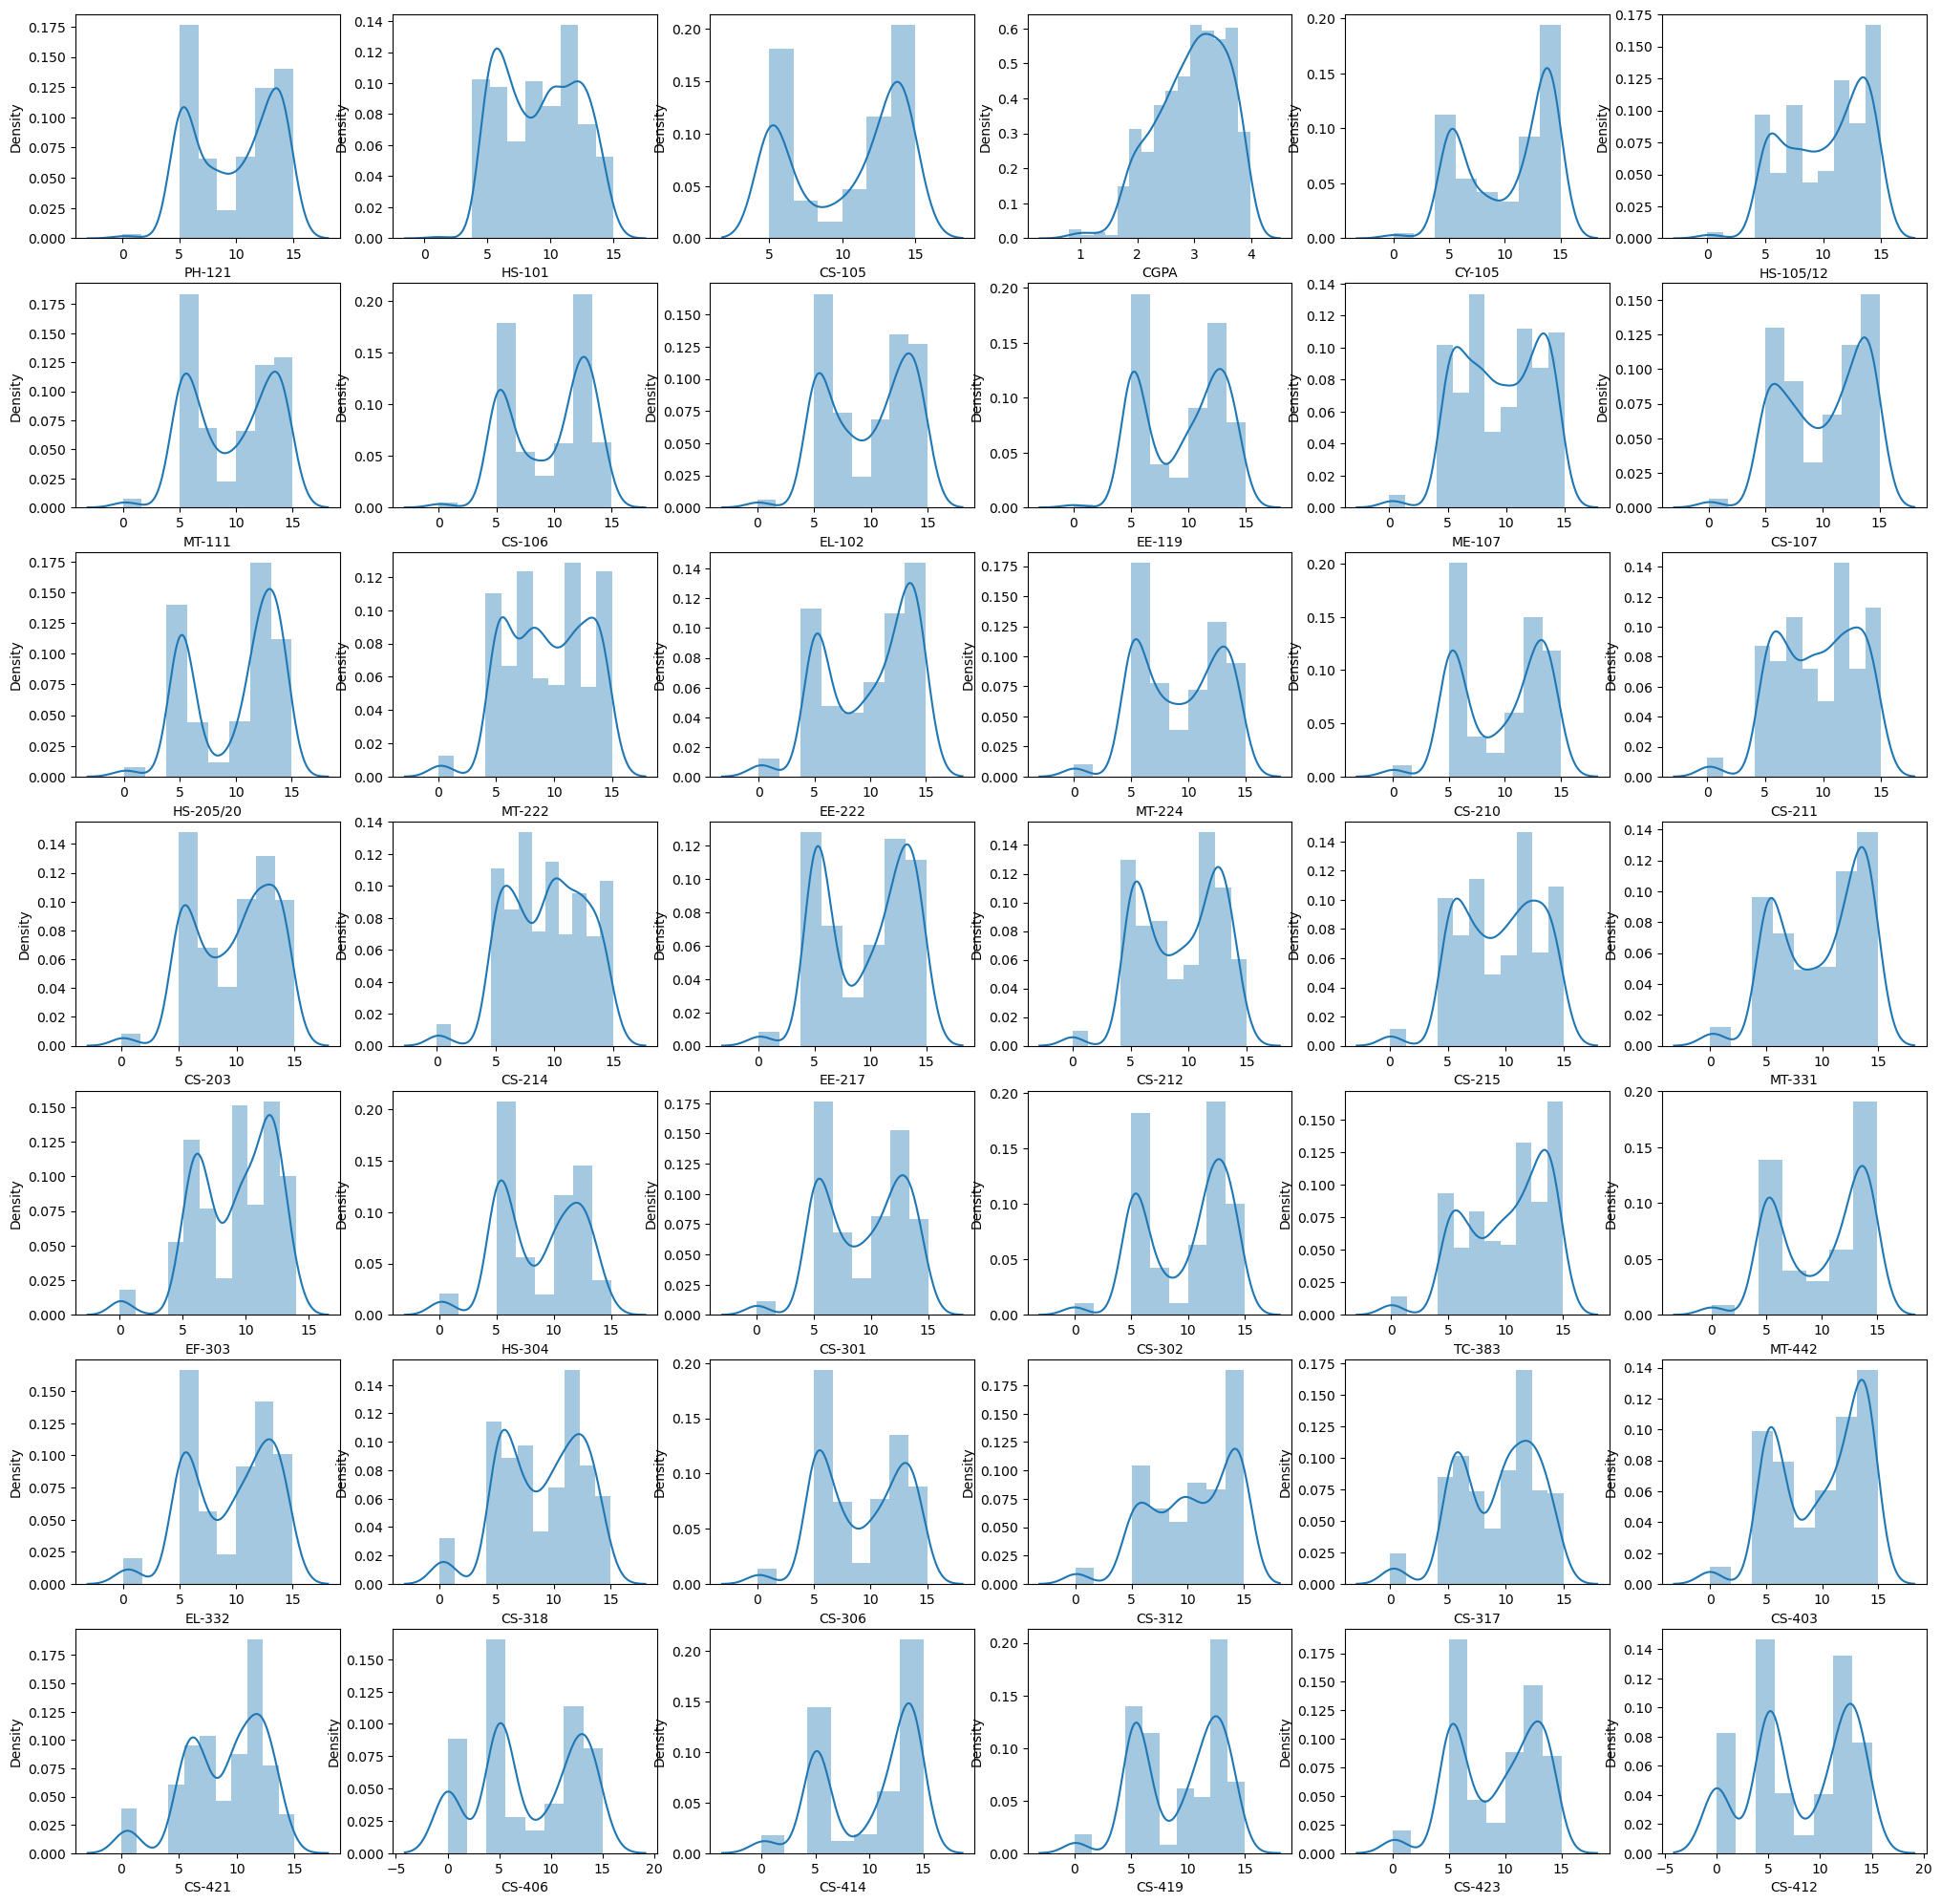

In [386]:
#check for the skewness in the dataset
plt.figure(figsize=(25,25))
p=1
for i in grade:
    if p<=42:
        plt.subplot(7,6,p)
        sns.distplot(grade[i])
    p=p+1
plt.show()

In [388]:
grade.skew()

PH-121      -0.199416
HS-101       0.057058
CS-105      -0.358052
CGPA        -0.497203
CY-105      -0.437103
HS-105/12   -0.356844
MT-111      -0.172071
CS-106      -0.335462
EL-102      -0.248555
EE-119      -0.217923
ME-107      -0.153219
CS-107      -0.316381
HS-205/20   -0.497769
MT-222      -0.206465
EE-222      -0.457668
MT-224      -0.177545
CS-210      -0.283129
CS-211      -0.271791
CS-203      -0.344025
CS-214      -0.241043
EE-217      -0.247112
CS-212      -0.265237
CS-215      -0.240379
MT-331      -0.418947
EF-303      -0.588771
HS-304      -0.244070
CS-301      -0.271731
CS-302      -0.454079
TC-383      -0.548620
MT-442      -0.373467
EL-332      -0.384820
CS-318      -0.376532
CS-306      -0.166412
CS-312      -0.523654
CS-317      -0.472509
CS-403      -0.441044
CS-421      -0.644212
CS-406      -0.156036
CS-414      -0.560475
CS-419      -0.365335
CS-423      -0.350429
CS-412      -0.260227
dtype: float64

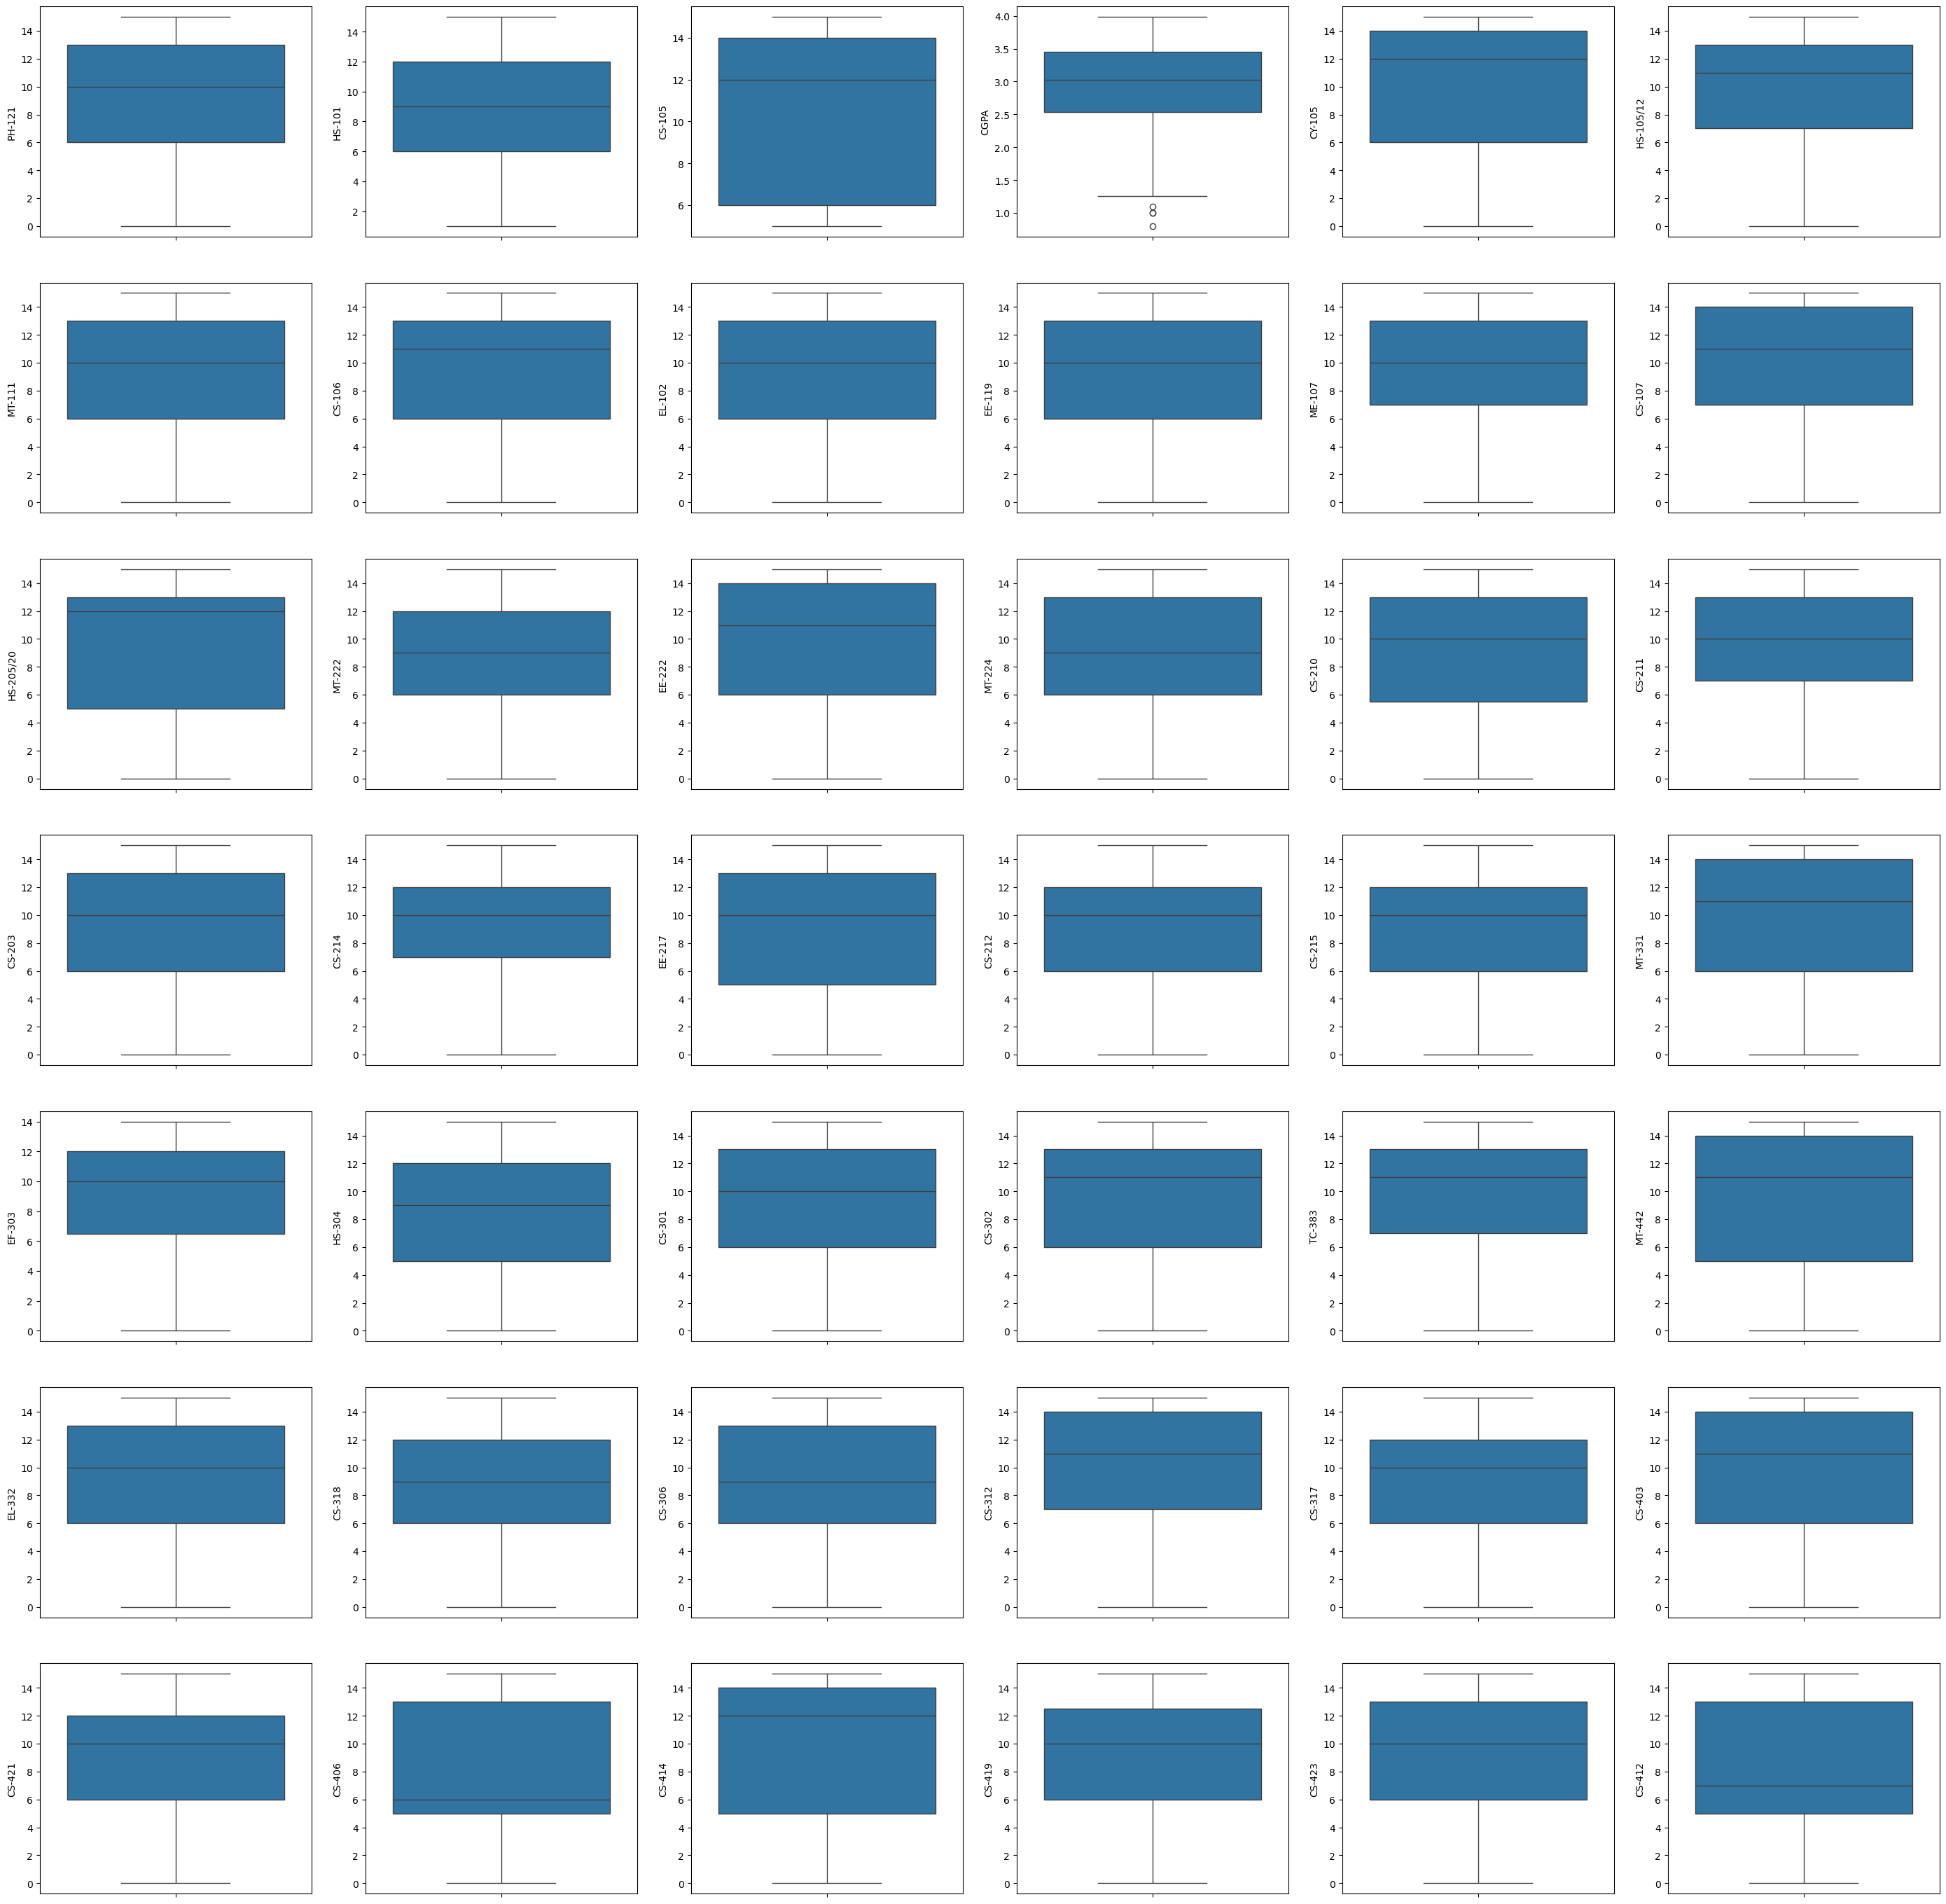

In [390]:
#check for the outliers in the dataset

plt.figure(figsize=(35,35))
p=1
for i in grade:
    if p<=42:
        plt.subplot(7,6,p)
        sns.boxplot(grade[i])
    p=p+1
plt.show()

In [392]:
#remove the outliers using zscore

z=np.abs(zscore(grade))
z

,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
97001,1.058937,0.050049,0.350486,1.209480,0.855233,0.056770,0.708603,0.464478,0.766588,0.998751,...,0.223580,0.895967,0.668339,0.752384,0.592490,0.563518,0.929233,0.609409,0.737661,0.625380
97002,1.153883,0.382347,0.089903,1.527217,0.341193,0.640832,0.979428,0.464478,1.154447,0.140747,...,0.319672,0.368547,0.376802,0.032055,0.299326,0.563518,0.930862,0.206789,0.205165,0.818667
97003,1.153883,0.946848,0.952426,1.053392,0.943907,1.224894,0.916346,1.041663,0.880014,1.284752,...,1.134551,0.422582,0.789344,1.077974,0.287003,1.273993,0.929233,1.295054,1.126076,1.231252
97004,0.505732,0.614549,1.392815,1.691731,0.341193,0.640832,0.437778,0.175885,0.766588,0.426748,...,0.591299,0.368547,0.206271,0.229424,0.592490,0.359350,0.464209,0.478856,0.471413,0.612374
97005,1.335540,1.379244,0.952426,0.795331,1.369272,0.819324,1.187171,1.330256,0.880014,1.289260,...,1.134551,1.159677,1.080881,0.816494,0.885655,0.563518,0.929233,1.153542,1.126076,1.231252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97567,0.600678,1.611446,0.952426,1.359839,0.943907,1.516925,1.457996,1.330256,1.315455,1.575261,...,1.038459,1.423387,1.251412,1.077974,1.459662,1.273993,0.696721,1.022988,0.737661,1.231252
97568,1.430485,1.611446,0.952426,1.317904,0.943907,1.111355,1.187171,1.267079,1.315455,1.289260,...,1.134551,0.686292,1.080881,1.077974,1.459662,0.563518,0.464209,1.153542,0.205165,0.625380
97569,0.600678,1.611446,0.952426,0.830814,1.369272,0.819324,1.187171,1.267079,1.154447,1.289260,...,1.038459,1.423387,0.789344,1.077974,1.166497,1.273993,0.000814,1.022988,1.126076,0.625380


In [394]:
np.where(z>3)

(array([ 44,  60,  91, 137, 142, 143, 143, 281, 281, 282, 288, 288, 454,
        565, 565], dtype=int64),
 array([24, 24, 24, 24, 24,  3, 24,  3, 24, 24,  3, 24, 24,  3, 24],
       dtype=int64))

In [396]:
stgrade=grade[(z<=3).all(axis=1)]
stgrade.head()

,PH-121,HS-101,CS-105,CGPA,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
97001,6,9,9,2.205,7,10,7,8,7,6,...,10,7,7,7,7,5,14,7,12,5
97002,14,8,10,2.008,9,8,6,8,14,9,...,8,9,8,10,8,5,6,10,10,12
97003,14,12,14,3.608,14,6,13,6,13,5,...,5,12,12,14,10,14,14,14,5,14
97004,8,11,5,1.906,9,8,8,9,7,8,...,7,9,10,9,7,6,12,11,11,11
97005,5,5,14,3.448,5,13,14,5,13,14,...,5,6,13,13,6,5,14,5,5,14


In [398]:
grade.shape

(571, 42)

In [400]:
stgrade.shape

(560, 42)

In [402]:
print("precentage of data loss",((grade.shape[0]-stgrade.shape[0])/grade.shape[0])*100)

precentage of data loss 1.926444833625219


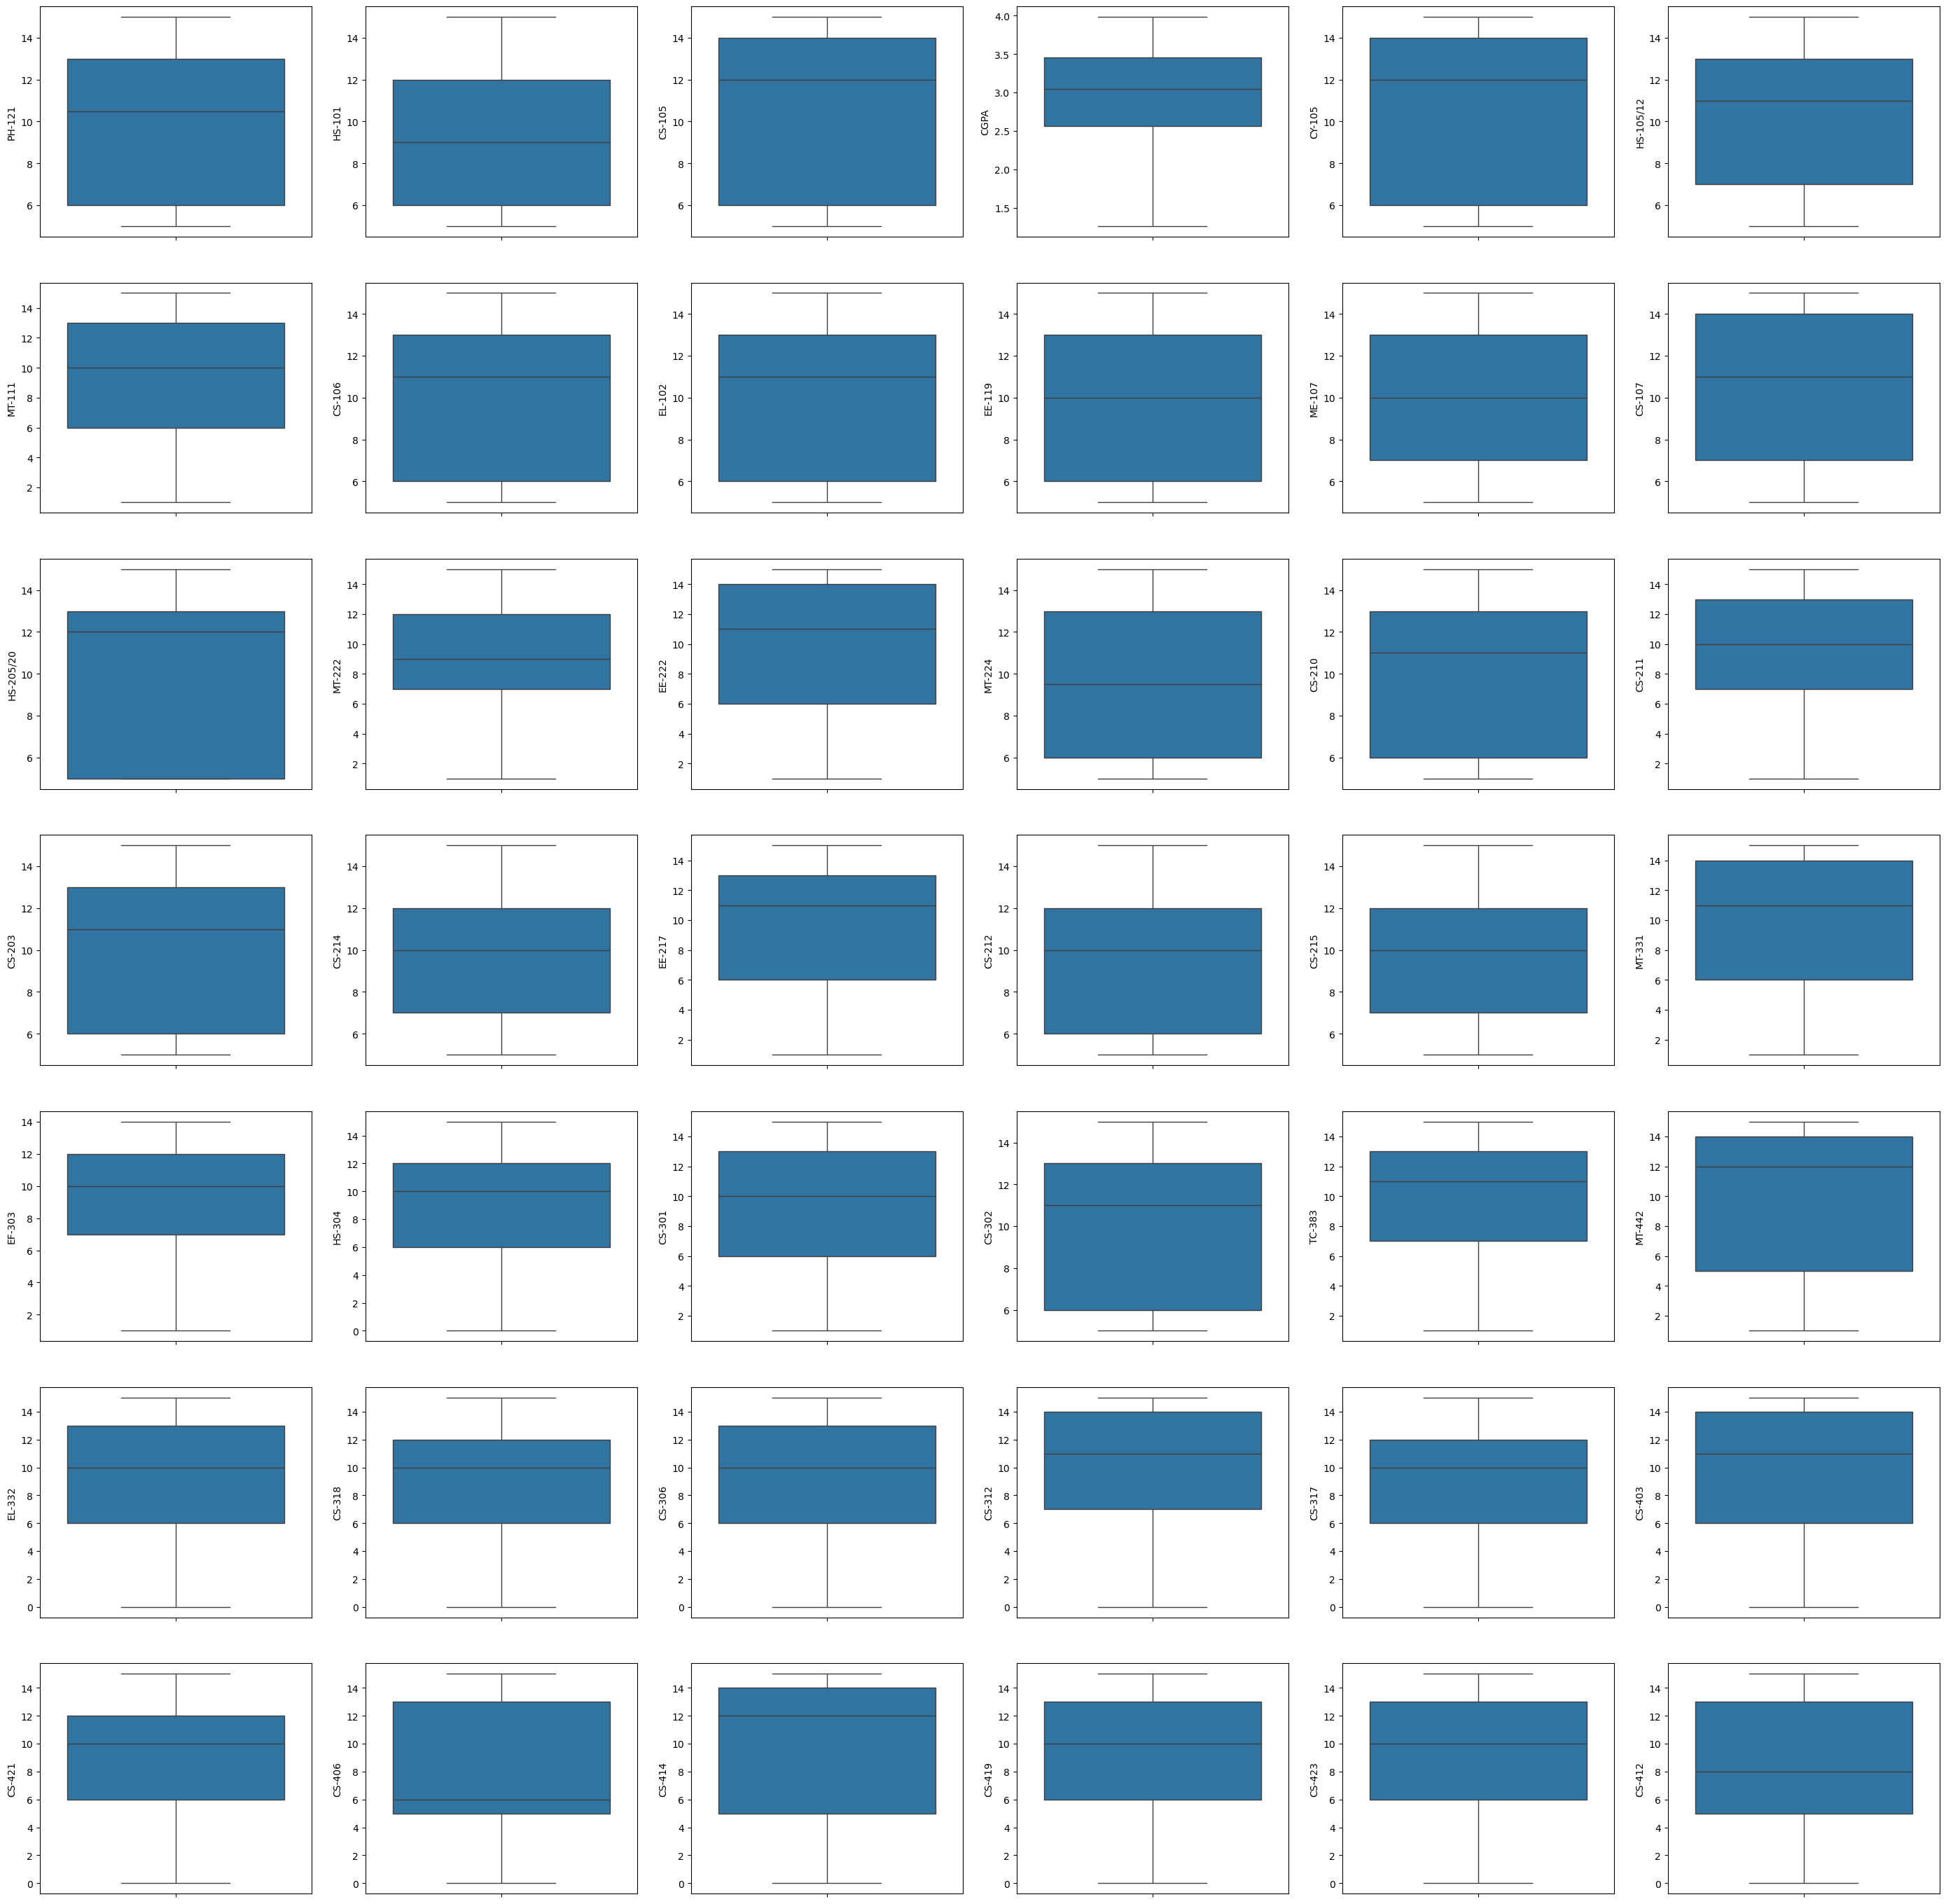

In [404]:
plt.figure(figsize=(35,35))
p=1
for i in stgrade:
    if p<=42:
        plt.subplot(7,6,p)
        sns.boxplot(stgrade[i])
    p=p+1
plt.show()

In [406]:
x=stgrade.drop(columns='CGPA',axis=1)
x.head()

,PH-121,HS-101,CS-105,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
97001,6,9,9,7,10,7,8,7,6,7,...,10,7,7,7,7,5,14,7,12,5
97002,14,8,10,9,8,6,8,14,9,8,...,8,9,8,10,8,5,6,10,10,12
97003,14,12,14,14,6,13,6,13,5,5,...,5,12,12,14,10,14,14,14,5,14
97004,8,11,5,9,8,8,9,7,8,11,...,7,9,10,9,7,6,12,11,11,11
97005,5,5,14,5,13,14,5,13,14,5,...,5,6,13,13,6,5,14,5,5,14


In [408]:
y=stgrade['CGPA']
y.head()

Seat No.
97001    2.205
97002    2.008
97003    3.608
97004    1.906
97005    3.448
Name: CGPA, dtype: float64

In [410]:
#check for multicollinearity in the dataset

def calc_vif(x):
    vif=pd.DataFrame()
    vif["Columns"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [412]:
calc_vif(x)

,Columns,VIF
0,PH-121,10.260422
1,HS-101,11.454721
2,CS-105,9.548476
3,CY-105,11.691164
4,HS-105/12,12.315810
5,MT-111,10.468584
6,CS-106,9.641137
7,EL-102,11.415695
8,EE-119,10.864661
9,ME-107,12.114891


In [414]:
#Apply standard Scaler

sc=StandardScaler()
xstandard=sc.fit_transform(x)
x_scaled=pd.DataFrame(xstandard,columns=x.columns)
x_scaled.head()

,PH-121,HS-101,CS-105,CY-105,HS-105/12,MT-111,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-1.089895,-0.055239,-0.360141,-0.905774,-0.090033,-0.760407,-0.503512,-0.823254,-1.039459,-0.815364,...,0.191455,-1.006273,-0.770652,-0.832222,-0.677786,-0.603961,0.925037,-0.695681,0.726799,-0.665117
1,1.148863,-0.387862,-0.100245,-0.379052,-0.690256,-1.039456,-0.503512,1.159029,-0.167621,-0.502836,...,-0.375819,-0.445284,-0.459053,-0.009791,-0.367435,-0.603961,-1.021495,0.166861,0.165796,0.801282
2,1.148863,0.942629,0.939337,0.937753,-1.290479,0.913884,-1.095880,0.875846,-1.330071,-1.440421,...,-1.226730,0.396198,0.787345,1.086784,0.253269,1.262357,0.925037,1.316917,-1.236710,1.220254
3,-0.530206,0.610006,-1.399723,-0.379052,-0.690256,-0.481359,-0.207329,-0.823254,-0.458234,0.434749,...,-0.659456,-0.445284,0.164146,-0.283935,-0.677786,-0.396593,0.438404,0.454375,0.446297,0.591797
4,-1.369740,-1.385730,0.939337,-1.432495,0.810301,1.192932,-1.392063,0.875846,1.285442,-1.440421,...,-1.226730,-1.286767,1.098944,0.812641,-0.988138,-0.603961,0.925037,-1.270710,-1.236710,1.220254


In [416]:
lr=LinearRegression()
knn=KNeighborsRegressor()
ls=Lasso()
rg=Ridge()
svr=SVR()
lsvr=LinearSVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
ada=AdaBoostRegressor()
gr=GradientBoostingRegressor()
bag=BaggingRegressor()
etr=ExtraTreesRegressor()

In [418]:
#cross val score to get the best model

models=[lr,knn,ls,rg,svr,lsvr,dtr,rfr,ada,gr,bag,etr]

for i in models:
    cvs=cross_val_score(i,x_scaled,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is",cvs,"\n Mean of the cross validation is",np.mean(cvs),"\n")

Cross validation score for LinearRegression() is [0.32820355 0.30260542 0.44096122 0.66524483 0.52967691] 
 Mean of the cross validation is 0.45333838715862146 

Cross validation score for KNeighborsRegressor() is [-0.92513922 -1.04521839 -0.47331659 -0.03862769 -0.13094747] 
 Mean of the cross validation is -0.5226498706006794 

Cross validation score for Lasso() is [-0.00496575 -0.00651711 -0.0011728  -0.00027669 -0.02825462] 
 Mean of the cross validation is -0.008237392858592419 

Cross validation score for Ridge() is [0.32853227 0.30300901 0.44131072 0.66515702 0.53044232] 
 Mean of the cross validation is 0.4536902659566705 

Cross validation score for SVR() is [0.78110207 0.9040217  0.9036637  0.89078783 0.79778295] 
 Mean of the cross validation is 0.8554716497858064 

Cross validation score for LinearSVR() is [0.23372178 0.2344653  0.37393254 0.60816214 0.4729229 ] 
 Mean of the cross validation is 0.38464093422175816 

Cross validation score for DecisionTreeRegressor() is [0.

In [420]:
#get the maximum random state
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    gr.fit(x_train,y_train)
    y_pred=gr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accurancy score is",maxacc,"and random state is",maxrs)

Accurancy score is 0.9664526374619972 and random state is 197


In [422]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=197)

In [424]:
x_train.shape

(392, 41)

In [426]:
x_test.shape

(168, 41)

In [428]:
y_train.shape

(392,)

In [430]:
y_test.shape

(168,)

In [432]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("Performance Metrics for",i)
    print("Training data Score",r2_score(y_train,y_pred_train))
    print("R-Score for test data",r2_score(y_test,y_pred))
    print("Mean Squared Error",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)),"\n")

Performance Metrics for LinearRegression()
Training data Score 0.5888080678120846
R-Score for test data 0.5349617884704078
Mean Squared Error 0.16935358712544296
Mean Absolute Error 0.34049743758969175
Root Mean Squared Error 0.41152592521667813 

Performance Metrics for KNeighborsRegressor()
Training data Score 0.16208950200724093
R-Score for test data -0.39576092654226747
Mean Squared Error 0.5082961223809525
Mean Absolute Error 0.5949071428571429
Root Mean Squared Error 0.7129488918435546 

Performance Metrics for Lasso()
Training data Score 0.0
R-Score for test data -0.006854397042894922
Mean Squared Error 0.36666751166831524
Mean Absolute Error 0.5072818270165209
Root Mean Squared Error 0.6055307685562438 

Performance Metrics for Ridge()
Training data Score 0.5888070174509513
R-Score for test data 0.535076622844059
Mean Squared Error 0.1693117677380873
Mean Absolute Error 0.3404208923719668
Root Mean Squared Error 0.41147511193034175 

Performance Metrics for SVR()
Training data 

In [433]:
#hyperparameter tuning for SVR()

param_grids={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error'],'max_features':['sqrt', 'log2']}

In [434]:
gscv=GridSearchCV(gr,param_grid=param_grids,return_train_score=True,cv=5)

In [438]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['sqrt', 'log2']},
             return_train_score=True)

In [440]:
gscv.best_params_

{'criterion': 'squared_error', 'loss': 'huber', 'max_features': 'sqrt'}

In [442]:
gr1=GradientBoostingRegressor(loss='squared_error',criterion='friedman_mse',max_features='log2')
gr1.fit(x_train,y_train)
y_predgr=gr1.predict(x_test)
y_predgr

array([3.05583445, 3.5306931 , 2.51417996, 1.97952962, 3.16237278,
       2.85452496, 2.01799407, 3.08017167, 3.60941691, 3.63265742,
       2.27108229, 3.83697605, 3.37014606, 3.87554374, 3.29245642,
       2.34278047, 3.05078243, 2.12437159, 2.46377778, 3.33612542,
       3.4805435 , 3.18114095, 3.37496098, 2.90295595, 3.54389916,
       3.56982757, 2.21620636, 3.5535841 , 3.46369602, 2.95166601,
       2.45672809, 3.3765812 , 2.83488854, 3.02919985, 2.43754957,
       3.80921203, 3.10852789, 3.66753315, 1.77168139, 3.97311686,
       2.48913554, 2.07570324, 2.83102738, 3.69030849, 1.99891993,
       2.63873256, 4.00324229, 3.31347158, 3.28868055, 4.029668  ,
       2.88630282, 2.74363945, 2.38816784, 3.21663014, 2.81223772,
       3.5588086 , 2.50339888, 3.41073551, 2.28161881, 2.71326479,
       3.09386043, 2.23412688, 2.13259516, 2.94274199, 2.33930562,
       3.10228882, 2.1148769 , 3.24585285, 1.93056264, 3.32616906,
       2.96209691, 3.47376212, 2.30535407, 3.60105472, 3.41146

In [448]:
print("R-Score",r2_score(y_test,y_predgr))
print("Mean Squared Error", mean_squared_error(y_test,y_predgr))
print("Mean Absolute Error", mean_absolute_error(y_test,y_predgr))

R-Score 0.9499209368808619
Mean Squared Error 0.01823735935851762
Mean Absolute Error 0.10345263731450653


In [450]:
#save the best model
import pickle

filename='StudentGrade.pkl'
pickle.dump(gr,open(filename,'wb'))

In [454]:
#Load the model
import pickle

model=pickle.load(open('StudentGrade.pkl','rb'))

In [456]:
model.fit(x_train,y_train)
y_predicts=model.predict(x_test)
y_predicts

array([3.20887028, 3.6058651 , 2.62210176, 2.13072428, 3.03442564,
       2.98391091, 2.08466315, 3.23113403, 3.60017831, 3.81398725,
       1.93642819, 3.80819159, 3.44702492, 3.90407806, 3.26113552,
       2.30386686, 2.89966712, 2.11102511, 2.30356659, 3.38793701,
       3.46683869, 2.92909153, 3.5298139 , 2.94502886, 3.6962183 ,
       3.64399161, 2.15470643, 3.56021826, 3.3711945 , 2.92226255,
       2.35599677, 3.26112075, 2.89290981, 2.96466207, 2.62417806,
       3.86214802, 3.28317994, 3.74934528, 1.6756337 , 3.92011622,
       2.7114696 , 1.97595577, 2.87849586, 3.75974438, 1.97249813,
       2.65458004, 3.9655362 , 3.40126083, 3.35115198, 3.99579388,
       2.97940045, 2.88579467, 2.26936153, 3.18493151, 2.82945327,
       3.28990403, 2.60282927, 3.37485581, 2.45934644, 2.43894682,
       3.09680777, 2.20444908, 2.03419695, 2.95524529, 2.26450957,
       2.94706953, 1.99555157, 3.18324562, 1.88366042, 3.3763754 ,
       2.92474801, 3.36516656, 2.44865155, 3.7057327 , 3.25831

In [458]:
df=pd.DataFrame()
df['Actual_value']=y_test
df['Predicted_output']=y_predicts
df

,Actual_value,Predicted_output
Seat No.,,
97159,3.114,3.208870
97372,3.631,3.605865
97379,2.525,2.622102
97411,2.040,2.130724
97421,3.356,3.034426
...,...,...
97069,2.715,2.624712
97131,2.698,2.615164
97453,3.332,3.415021
